Note: This was originally a take home project
The goal was to build as accurate a regression model as possible on the censored, high dimensional model, as measured by Mean Squared Error (MSE).

In [27]:
# Standard Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

print('Done')

Done


## Exploratory Analysis

In [3]:
train_data = pd.read_csv('testcode_train.txt', delimiter='\t')
test_data = pd.read_csv('testcode_test.txt', delimiter='\t')

# Display first few rows of training data
train_data.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [4]:
# Summary statistics of the training data
train_data.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


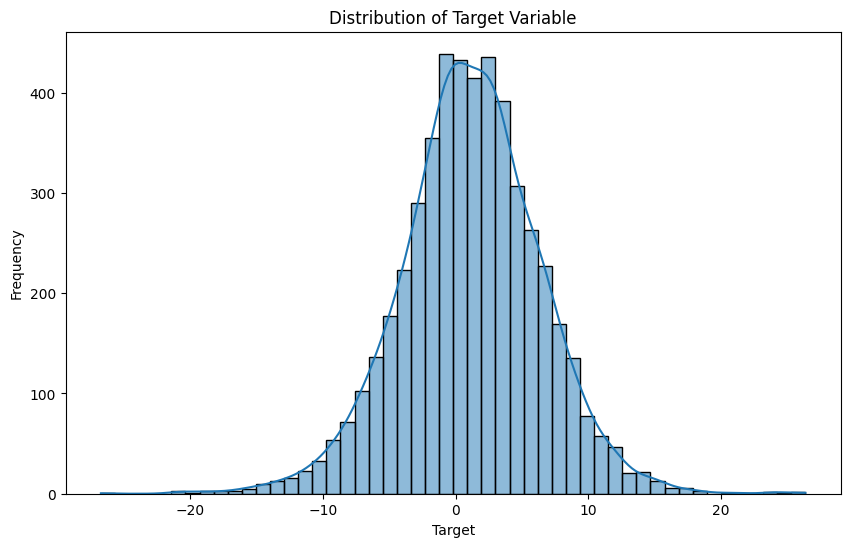

In [5]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [6]:
non_numeric_cols = [col for col, dtype in train_data.dtypes.items() if dtype not in ['float64', 'int64']]

if non_numeric_cols:
    print(f"Columns with non-numeric data types: {non_numeric_cols}")
else:
    print("All columns have float or integer data types.")

Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


In [7]:
train_data['f_61'].head(), train_data['f_121'].head(), train_data['f_215'].head(), train_data['f_237'].head(), 

(0    b
 1    a
 2    b
 3    a
 4    b
 Name: f_61, dtype: object,
 0    D
 1    A
 2    B
 3    C
 4    E
 Name: f_121, dtype: object,
 0       red
 1      blue
 2    orange
 3      blue
 4    orange
 Name: f_215, dtype: object,
 0    Canada
 1    Canada
 2    Canada
 3       USA
 4    Canada
 Name: f_237, dtype: object)

In [8]:
non_numeric_features = train_data.dtypes[train_data.dtypes == 'object'].index

# Encoding the non-numeric features
encoder = LabelEncoder()
for feature in non_numeric_features:
    train_data[feature] = encoder.fit_transform(train_data[feature].astype(str))

# Confirming that all features are now numeric
train_data.dtypes[train_data.dtypes != 'float64']

f_61     int32
f_121    int32
f_215    int32
f_237    int32
dtype: object

In [9]:
train_data['f_61'].head(), train_data['f_121'].head(), train_data['f_215'].head(), train_data['f_237'].head(), 

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: f_61, dtype: int32,
 0    3
 1    0
 2    1
 3    2
 4    4
 Name: f_121, dtype: int32,
 0    3
 1    0
 2    2
 3    0
 4    2
 Name: f_215, dtype: int32,
 0    0
 1    0
 2    0
 3    2
 4    0
 Name: f_237, dtype: int32)

In [10]:
non_numeric_cols = [col for col, dtype in test_data.dtypes.items() if dtype not in ['float64', 'int64']]

if non_numeric_cols:
    print(f"Columns with non-numeric data types: {non_numeric_cols}")
else:
    print("All columns have float or integer data types.")

Columns with non-numeric data types: ['f_61', 'f_121', 'f_215', 'f_237']


In [11]:
non_numeric_features_test = test_data.dtypes[test_data.dtypes == 'object'].index

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding the non-numeric features
encoder = LabelEncoder()
for feature in non_numeric_features_test:
    test_data[feature] = encoder.fit_transform(test_data[feature].astype(str))

# Confirming that all features are now numeric
test_data.dtypes[test_data.dtypes != 'float64']

f_61     int32
f_121    int32
f_215    int32
f_237    int32
dtype: object

In [13]:
# Check missing values in train_data
missing_train = train_data.isna().sum()
print("Missing values in train_data:")
print(missing_train[missing_train > 0])

# Check missing values in test_data
missing_test = test_data.isna().sum()
print("\nMissing values in test_data:")
print(missing_test[missing_test > 0])

Missing values in train_data:
f_0       97
f_1       72
f_2       92
f_3       90
f_4       93
        ... 
f_249    114
f_250    100
f_251     79
f_252     96
f_253     96
Length: 250, dtype: int64

Missing values in test_data:
f_0      28
f_1      17
f_2      17
f_3      18
f_4      22
         ..
f_249    20
f_250    19
f_251    22
f_252    21
f_253    15
Length: 250, dtype: int64


In [14]:
# Filling missing values in train_data with median
for column in train_data.columns:
    median_value = train_data[column].median()
    train_data[column].fillna(median_value, inplace=True)

# Filling missing values in test_data with median
for column in test_data.columns:
    median_value = test_data[column].median()
    test_data[column].fillna(median_value, inplace=True)

In [15]:
# Check missing values in train_data
missing_train = train_data.isna().sum()
print("Missing values in train_data:")
print(missing_train[missing_train > 0])

# Check missing values in test_data
missing_test = test_data.isna().sum()
print("\nMissing values in test_data:")
print(missing_test[missing_test > 0])


Missing values in train_data:
Series([], dtype: int64)

Missing values in test_data:
Series([], dtype: int64)


## Modeling Phase

In [16]:
# Separating features and target variable from training data
X = train_data.drop('target', axis=1)
y = train_data['target']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

# Initializing the model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculating the mean squared error
mse = mean_squared_error(y_val, y_val_pred)
mse

14.010723344651986

In [17]:
Cs = 10. ** np.arange(-3, 4)
Ridge_params = {'alpha': Cs.tolist()}

Ridge_Model = GridSearchCV(Ridge(), param_grid= Ridge_params)

Ridge_Model.fit(X_train_scaled, y_train)
y_val_pred = Ridge_Model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
mse


14.009024333650855

In [18]:
Lasso_Model = GridSearchCV(Lasso(), param_grid= Ridge_params)

Lasso_Model.fit(X_train_scaled, y_train)
y_val_pred = Lasso_Model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
mse


13.624373730071802

In [19]:
Dtree_params = {'random_state': [22], 'ccp_alpha' : Cs.tolist()}

Dtree_Model = GridSearchCV(DecisionTreeRegressor(), param_grid= Dtree_params)

Dtree_Model.fit(X_train_scaled, y_train)
y_val_pred = Dtree_Model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
mse


16.6645766375586

In [25]:
NN_param_grid = {"n_neighbors": [1,2,3,5,10,20,50,75,100]}

NN_Model = GridSearchCV(KNeighborsRegressor(), param_grid= NN_param_grid)

NN_Model.fit(X_train_scaled, y_train)
y_val_pred =NN_Model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
mse

23.105307183881653

In [28]:
gammas = 10. ** np.arange(-3, 3)


rbf_grid = {'C':Cs, 'gamma':gammas, 'kernel':['rbf']}


SVMachine = GridSearchCV(SVR(),param_grid= rbf_grid)

SVMachine.fit(X_train_scaled, y_train)
y_val_pred =SVMachine.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
mse

11.564998423970101

We select the Support Vector Machine as our final model.